<center><h1>Hou_Shengtao_HW5</h1></center>
<br>
<br>

Name: Shengtao Hou      
<br>
Github Username: Tonyhou521
<br>
USC ID: 9712707229  

## 1. Decision Trees as Interpretable Models

Import packages

In [280]:
import numpy as np
import pandas as pd
import xgboost
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### (a) Obtain Data

Get the Accute Inamations Data Set

In [281]:
'''
Attribute Information:

a1 Temperature of patient { 35C-42C }
a2 Occurrence of nausea { yes, no }
a3 Lumbar pain { yes, no }
a4 Urine pushing (continuous need for urination) { yes, no }
a5 Micturition pains { yes, no }
a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }
d1 decision: Inflammation of urinary bladder { yes, no }
d2 decision: Nephritis of renal pelvis origin { yes, no } 
'''


column_name = ['A1','A2','A3','A4','A5','A6','D1','D2']

df = pd.read_csv("../data/Homework 5 Data/diagnosis.data", sep='\s+', encoding='UTF_16', header=None, decimal=',')
df.columns = column_name
df




,A1,A2,A3,A4,A5,A6,D1,D2
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


### (b) Build a decision tree

In [282]:
## transform the data into binary format for every column
for col in column_name:
    if col != 'A1':
        df[col] = df[col].map({'yes':1, 'no':0})

df

,A1,A2,A3,A4,A5,A6,D1,D2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [283]:
## train split for decision tree
from sklearn.model_selection import train_test_split

trainX = df.drop(['D1','D2'], axis=1)
trainy1 = df['D1']
trainy2 = df['D2']
trainY = df[['D1','D2']]

print(trainX, trainy1, trainy2)



       A1  A2  A3  A4  A5  A6
0    35.5   0   1   0   0   0
1    35.9   0   0   1   1   1
2    35.9   0   1   0   0   0
3    36.0   0   0   1   1   1
4    36.0   0   1   0   0   0
..    ...  ..  ..  ..  ..  ..
115  41.4   0   1   1   0   1
116  41.5   0   0   0   0   0
117  41.5   1   1   0   1   0
118  41.5   0   1   1   0   1
119  41.5   0   1   1   0   1

[120 rows x 6 columns] 0      0
1      1
2      0
3      1
4      0
      ..
115    0
116    0
117    0
118    0
119    0
Name: D1, Length: 120, dtype: int64 0      0
1      0
2      0
3      0
4      0
      ..
115    1
116    0
117    1
118    1
119    1
Name: D2, Length: 120, dtype: int64


=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 37.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  37.95
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1

=======| DECISION TREE: PLOT |=======


[Text(0.4, 0.875, 'X[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'X[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'X[0] <= 37.95\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

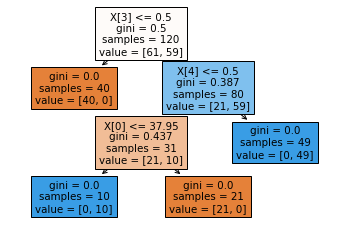

In [284]:
classifier = DecisionTreeClassifier(random_state=50)
model = classifier.fit(trainX, trainy1)
text = tree.export_text(classifier)
print("=======| DECISION TREE: TEXT REPRESENTATION |=======")
print(text)

print("=======| DECISION TREE: PLOT |=======")
tree.plot_tree(classifier, filled=True)

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1

=======| DECISION TREE: PLOT |=======


[Text(0.4, 0.8333333333333334, 'X[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'X[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

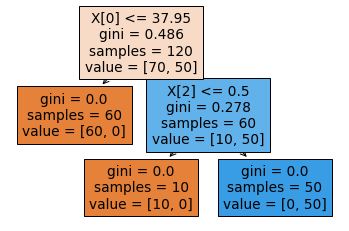

In [285]:
classifier = DecisionTreeClassifier(random_state=50)
model = classifier.fit(trainX, trainy2)
text = tree.export_text(classifier)
print("=======| DECISION TREE: TEXT REPRESENTATION |=======")
print(text)

print("=======| DECISION TREE: PLOT |=======")
tree.plot_tree(classifier, filled=True)

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0

=======| DECISION TREE: PLOT |=======


[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

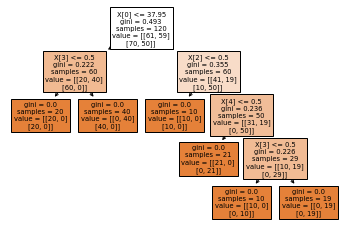

In [286]:
classifier = DecisionTreeClassifier(random_state=50)
model = classifier.fit(trainX, trainY)
text = tree.export_text(classifier)
print("=======| DECISION TREE: TEXT REPRESENTATION |=======")
print(text)

print("=======| DECISION TREE: PLOT |=======")
tree.plot_tree(classifier, filled=True)

### (c) Convert the decision rules

In [287]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)
	
tree_to_code(classifier, trainX.columns)

def tree(A1, A2, A3, A4, A5, A6):
  if A1 <= 37.95000076293945:
    if A4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if A4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if A1 > 37.95000076293945
    if A3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if A3 > 0.5
      if A5 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if A5 > 0.5
        if A4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if A4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


1D Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.

[0.  0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1. ]
Best ccp_alpha: 0.0
Accuracy of minimal decision tree: 1.0


[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.498\nsamples = 96\nvalue = [[50, 46]\n[52, 44]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.22\nsamples = 43\nvalue = [[14, 29]\n[43, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[14, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [[0, 29]\n[29, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.359\nsamples = 53\nvalue = [[36, 17]\n[9, 44]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [[9, 0]\n[9, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.237\nsamples = 44\nvalue = [[27, 17]\n[0, 44]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [[18, 0]\n[0, 18]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.226\nsamples = 26\nvalue = [[9, 17]\n[0, 26]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [[9, 0]\n[0, 9]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [[0, 17]\n[0, 17]]')]

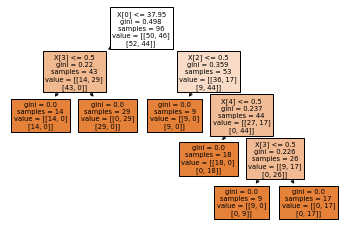

In [288]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(trainX, trainY, test_size=0.2, random_state=50)

# Define a range of ccp_alpha values for grid search
## 0.1 0.2 0.3

ccp_alpha_range = np.linspace(0, 1, 10)

ccp_alpha_range = np.around(ccp_alpha_range, decimals=1)
print(ccp_alpha_range)

# Set up the decision tree classifier with the ccp_alpha range for grid search
tree1 = DecisionTreeClassifier(random_state=50)
param_grid = {'ccp_alpha': ccp_alpha_range}
cv = KFold(n_splits=5, shuffle=True, random_state=50)

# Perform grid search with cross-validation to find the best ccp_alpha value
grid_search = GridSearchCV(tree1, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Retrieve the best ccp_alpha value and the corresponding decision tree
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
minimal_tree = grid_search.best_estimator_


# Evaluate the performance of the minimal decision tree
y_pred_minimal = minimal_tree.predict(X_test)
print("Best ccp_alpha:", best_ccp_alpha)
print("Accuracy of minimal decision tree:", accuracy_score(y_test, y_pred_minimal))
best_classifier = DecisionTreeClassifier(random_state=50, ccp_alpha=best_ccp_alpha)
best_classifier.fit(X_train, y_train)

tree.plot_tree(best_classifier, filled=True)





In [289]:
tree_to_code(best_classifier, trainX.columns)

def tree(A1, A2, A3, A4, A5, A6):
  if A1 <= 37.95000076293945:
    if A4 <= 0.5:
      return [[14.  0.]
 [14.  0.]]
    else:  # if A4 > 0.5
      return [[ 0. 29.]
 [29.  0.]]
  else:  # if A1 > 37.95000076293945
    if A3 <= 0.5:
      return [[9. 0.]
 [9. 0.]]
    else:  # if A3 > 0.5
      if A5 <= 0.5:
        return [[18.  0.]
 [ 0. 18.]]
      else:  # if A5 > 0.5
        if A4 <= 0.5:
          return [[9. 0.]
 [0. 9.]]
        else:  # if A4 > 0.5
          return [[ 0. 17.]
 [ 0. 17.]]


def tree(temperature, nausea_occurence, lumbar_pain, urine_pushing, micturition_pains, burning_urethra):
  if temperature <= 37.95000076293945:
    if urine_pushing <= 0.5:
      return [[14.  0.]
 [14.  0.]]
    else:  # if urine_pushing > 0.5
      return [[ 0. 29.]
 [29.  0.]]
  else:  # if temperature > 37.95000076293945
    if lumbar_pain <= 0.5:
      return [[9. 0.]
 [9. 0.]]
    else:  # if lumbar_pain > 0.5
      if micturition_pains <= 0.5:
        return [[18.  0.]
 [ 0. 18.]]
      else:  # if micturition_pains > 0.5
        if urine_pushing <= 0.5:
          return [[9. 0.]
 [0. 9.]]
        else:  # if urine_pushing > 0.5
          return [[ 0. 17.]
 [ 0. 17.]]


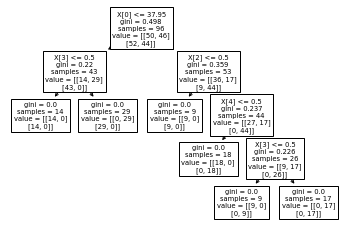

In [290]:
def get_decision_rules_with_high_interpretability():
    features = ['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra']
    features_d1_d2 = ['inflammation_pred', 'nephritis_pred']
    dot_data = tree.export_graphviz(minimal_tree, out_file=None, 
                                    feature_names=features,  
                                    class_names=features_d1_d2,
                                    filled=True)
    tree.plot_tree(minimal_tree)
    return features

features = get_decision_rules_with_high_interpretability()
tree_to_code(minimal_tree, features)

## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [300]:
CRIME_DATA_COLS = "../data/Homework 5 Data/communities.names"
def get_columns_crime_data(filename):
    cols = []
    if 'communities' in filename:
        file = open(filename)
        for line in file:
            if "@attribute" in line:
                line = line.split(" ")
                cols.append(line[1])
        return cols

cols = get_columns_crime_data(CRIME_DATA_COLS)



df2 = pd.read_csv("../data/Homework 5 Data/communities.data",header=None, na_values='?')
df2.columns = cols
df2

train_df = df2.iloc[:1495,:]
test_df = df2.iloc[1495:, :]

display(train_df)
display(test_df)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,NaN,NaN,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,6,NaN,NaN,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,NaN,NaN,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,39,85.0,49056.0,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
1495,6,NaN,NaN,MillValleycity,8,0.00,0.20,0.03,0.91,0.23,...,0.01,0.23,0.73,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1496,48,NaN,NaN,LiveOakcity,8,0.00,0.55,0.13,0.78,0.15,...,0.01,0.18,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.11
1497,35,NaN,NaN,Portalescity,8,0.00,0.52,0.04,0.59,0.05,...,0.01,0.18,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0.12
1498,42,17.0,25112.0,Fallstownship,8,0.04,0.51,0.07,0.92,0.09,...,0.06,0.13,0.16,NaN,NaN,NaN,NaN,0.00,NaN,0.06
1499,51,683.0,48952.0,Manassascity,8,0.03,0.59,0.20,0.75,0.19,...,0.03,0.23,0.06,NaN,NaN,NaN,NaN,0.00,NaN,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,NaN,NaN,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,NaN,NaN,NaN,NaN,0.00,NaN,0.09
1990,6,NaN,NaN,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,NaN,NaN,NaN,NaN,0.00,NaN,0.45
1991,9,9.0,80070.0,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0.0,0.91,0.28,0.23
1992,25,17.0,72600.0,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0.0,0.22,0.18,0.19


### (b) Missing values

### (c) Plot a correlation matrix

### (d) Calculate the Coefficient of Variation CV

### (e) Scatter plots and box plots for highest CV features

### (f) Fit a linear model

### (g) Fit a ridge regression model

### (h) Fit a LASSO model

### (i) Fit a PCR model

### (j) Fit a boosting tree